## calculate the correlation between XRN2 isoforms and all other genes
- XRN2 has eQTL, isoQTL, sQTL in fetal data
- only one isoforms in gencodev33, has isoQTL
- one intron has sQTL, corresponds to Minsoo's unannotated isoform discovery, the cluster has 4 introns in total

In [22]:
library(data.table)
library(tidyverse)
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




**read splicing**
- 20:21284111:21307128:clu_94275_NA, XRN2 intron that has sQTL, also corresponds to Minsoo's unannotated isoform
- the cluster has 4 introns

In [2]:
splicing.dat <- fread("/u/project/gandalm/cindywen/isoform_twas/sqtl_new/cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.tsv", data.table = F)

Warning message in fread("/u/project/gandalm/cindywen/isoform_twas/sqtl_new/cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.tsv", :
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [4]:
head(splicing.dat)

,V1,Br2410,1513,RNAID1940,RNAID1946,Br1800,11237,18015,11149,1821,...,11397,11880,RNAID1951,15240,RNAID1907,1733,11793,11451,RNAID1944,1746
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1:14829:14930:clu_7637_NA,-0.7624343,-0.4270108,1.6281660,-0.3610890,0.12970916,-0.7068511,0.6120102,0.7145593,-0.3963618,...,-0.46691056,0.1281325,-0.6323465,1.1516062,0.5373307,-0.5564796,1.0873845,0.5339986,-0.4799547,0.3919791
2,1:14829:14970:clu_7637_NA,0.8002152,0.8051742,-0.7684091,0.8834424,-0.34494925,0.4919904,-1.8686184,-1.7530881,0.8429926,...,-0.06677221,0.6614452,0.6134831,-0.9416921,-0.9971887,0.6685070,0.6680873,-1.5665103,0.7542310,-0.9647780
3,1:14829:15021:clu_7637_NA,-0.8709895,-0.5238565,0.2172191,-0.4611636,-0.02537779,-0.3643302,1.1308208,-0.1863440,-0.4949154,...,0.05487654,-0.4111235,-0.7240991,0.1446305,1.0215702,-0.6478942,0.1923487,-1.1055001,-0.5755310,0.7907820
4,1:14829:15796:clu_7637_NA,-0.8283478,-0.4560950,0.2010250,-0.3924181,-0.02743139,-0.3435302,1.1683318,-0.2329144,-0.4253269,...,-0.03192361,-0.3376277,-0.6120497,-0.6299210,0.9815394,-0.5672837,0.1145237,-0.9251284,-0.4975410,0.7571724
5,1:15038:15796:clu_7637_NA,-1.4947229,-0.5166798,-1.5522815,-0.4363100,0.62672548,-0.4509515,1.7672359,0.5920107,-0.4778459,...,0.40185990,-0.3410882,-0.7135180,0.1596653,1.4284529,-0.6570166,-0.6128119,0.4997270,-0.5689909,1.1294720
6,1:15942:16607:clu_7638_NA,2.4746864,-0.5342547,-0.4351503,0.1753570,-0.82305050,-0.3783636,1.5144772,1.5025863,1.5222648,...,0.53904312,-0.8173156,1.1134906,-0.3239236,-0.7224049,1.3239560,0.7139717,-0.4593229,-0.6143907,-0.2557509


In [5]:
colnames(splicing.dat)[1] <- "Intron"

In [53]:
splicing.dat %>% filter(str_detect(Intron, "clu_94275"))

Intron,1513,RNAID1940,RNAID1946,Br1800,11237,18015,11149,1821,RNAID1927,...,11397,11880,RNAID1951,15240,RNAID1907,1733,11793,11451,RNAID1944,1746
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20:21284111:21306917:clu_94275_NA,-0.45960495,0.5180556,1.1102015,0.7226659,-8.235562e-02,0.009158354,-0.7123871,0.7388803,1.2161916,...,-0.01771496,-0.3792345,-0.6795670,1.1677978,0.8187921,0.9166633,1.0079470,-0.08763065,0.8398846,-2.4841793
20:21284111:21307128:clu_94275_NA,-0.09133996,-0.1674173,1.2651097,-0.6242248,-2.982776e-01,-0.924116614,-0.4610809,0.7086454,-0.7331388,...,-0.74440561,1.0104086,0.2561661,1.0203095,-0.6738424,1.3291629,0.6806129,0.21945877,-0.9722874,1.8528816
20:21284485:21306917:clu_94275_NA,0.84352050,-0.1361627,-0.2716194,-0.5836094,4.192239e-01,-0.390398356,-1.2114113,-0.2914701,-0.5414476,...,-0.23254678,-0.0146809,-0.5321438,-0.8151194,-0.1343633,1.1704988,0.2757914,0.53184128,-0.1225009,0.8770566
20:21307044:21307128:clu_94275_NA,0.47850013,0.3004017,-1.2361604,0.3765087,7.391409e-05,0.657262457,1.1552863,-0.6270314,-0.7531323,...,0.73400243,-0.2217194,0.3011699,-0.9739964,-0.5380873,-1.7694057,-1.6037416,-0.94577266,0.1513224,1.0868326


**read isoform expression**

In [24]:
# batch corrected, no covariates
# N=639, expression outlier samples excluded, genotype relatives included
dat <- fread("/u/project/gandalm/cindywen/isoform_twas/isoqtl_new/data/tx.counts.processed.tsv", data.table = F)

Warning message in fread("/u/project/gandalm/cindywen/isoform_twas/isoqtl_new/data/tx.counts.processed.tsv", :
“Detected 639 column names but the data has 640 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [78]:
# head(dat)

In [26]:
colnames(dat)[1] <- "Tx"

In [89]:
map <- fread("/u/project/gandalm/cindywen/isoform_twas/salmon/tx2gene_gencode_v33_noGeneVersion.tsv", data.table = F)

In [79]:
# head(map)

In [29]:
dim(map)
length(unique(map$Tx))

[1] 228715      2

[1] 228715

In [6]:
gtf <- fread("/u/project/gandalm/cindywen/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [13]:
# head(gtf)

In [7]:
gtf <- gtf %>% select(ensg, V11, V12)

In [91]:
map <- map %>% inner_join(gtf, by = c("Gene" = "ensg"))
dim(map)
length(unique(map$Tx))

[1] 228876      4

[1] 228711

In [92]:
head(map)

,Tx,Gene,V11,V12
,<chr>,<chr>,<chr>,<chr>
1,ENST00000456328.2_1,ENSG00000223972,transcribed_unprocessed_pseudogene,DDX11L1
2,ENST00000450305.2_1,ENSG00000223972,transcribed_unprocessed_pseudogene,DDX11L1
3,ENST00000488147.1_2,ENSG00000227232,unprocessed_pseudogene,WASH7P
4,ENST00000473358.1_1,ENSG00000243485,lncRNA,MIR1302-2HG
5,ENST00000469289.1_1,ENSG00000243485,lncRNA,MIR1302-2HG
6,ENST00000417324.1_2,ENSG00000237613,lncRNA,FAM138A


In [93]:
map %>% filter(V12 == "XRN2")

Tx,Gene,V11,V12
<chr>,<chr>,<chr>,<chr>
ENST00000377191.5_2,ENSG00000088930,protein_coding,XRN2


### correlation between XRN2 isoform/intron and all genes

In [15]:
# # correlation between the expression of XRN2 isoform and all other isoforms
# df <- as.data.frame(dat[,1])
# colnames(df)[1] <- "Tx"

In [64]:
# for (i in 1:nrow(df)) {
#     df[i,'cor'] <- cor(unlist(dat[which(dat$Tx == "ENST00000377191.5_2"),2:640]), 
#                        unlist(dat[i, 2:640]), method = "pearson")
# }

In [8]:
# correlation between the expression of XRN2 isoform and all other genes
gene.dat <- fread("/u/project/gandalm/cindywen/isoform_twas/eqtl_new/data/gene.counts.processed.tsv", data.table = F)

Warning message in fread("/u/project/gandalm/cindywen/isoform_twas/eqtl_new/data/gene.counts.processed.tsv", :
“Detected 642 column names but the data has 643 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [9]:
colnames(gene.dat)[1] <- "Gene"

**splicing**

In [10]:
shared <- intersect(colnames(splicing.dat), colnames(gene.dat)) # shared samples
length(shared)

[1] 642

In [11]:
gene.dat <- gene.dat %>% select(Gene, all_of(shared))
splicing.dat <- splicing.dat %>% select(Intron, all_of(shared))

In [12]:
df <- as.data.frame(gene.dat[,1])
colnames(df)[1] <- "Gene"

In [13]:
dim(splicing.dat)

[1] 273167    643

In [14]:
for (i in 1:nrow(df)) {
    df[i,'cor'] <- cor(unlist(splicing.dat[which(splicing.dat$Intron == "20:21284111:21307128:clu_94275_NA"),2:643]), 
                       unlist(gene.dat[i, 2:643]), method = "pearson")
}

In [16]:
head(df)
head(gtf)

,Gene,cor
,<chr>,<dbl>
1,ENSG00000000419,-0.12389030
2,ENSG00000000457,-0.13812731
3,ENSG00000000460,-0.27343963
4,ENSG00000000938,0.08976489
5,ENSG00000000971,-0.01498098
6,ENSG00000001036,-0.09441291


,ensg,V11,V12
,<chr>,<chr>,<chr>
1,ENSG00000223972,transcribed_unprocessed_pseudogene,DDX11L1
2,ENSG00000227232,unprocessed_pseudogene,WASH7P
3,ENSG00000243485,lncRNA,MIR1302-2HG
4,ENSG00000237613,lncRNA,FAM138A
5,ENSG00000268020,unprocessed_pseudogene,OR4G4P
6,ENSG00000240361,transcribed_unprocessed_pseudogene,OR4G11P


In [17]:
df1 <- df %>% inner_join(gtf, by = c("Gene" = "ensg"))
colnames(df1)[3] <- "gene_type"
colnames(df1)[4] <- "gene_name"

In [18]:
df1 %>% arrange(desc(abs(cor))) %>% head()

,Gene,cor,gene_type,gene_name
,<chr>,<dbl>,<chr>,<chr>
1,ENSG00000116675,0.4060202,protein_coding,DNAJC6
2,ENSG00000153814,0.3802667,protein_coding,JAZF1
3,ENSG00000142192,0.3745854,protein_coding,APP
4,ENSG00000105784,0.3717949,protein_coding,RUNDC3B
5,ENSG00000136492,-0.3685561,protein_coding,BRIP1
6,ENSG00000136531,0.3682606,protein_coding,SCN2A


In [19]:
range(df1$cor)

[1] -0.3685561  0.4060202

In [20]:
df1 %>% filter(gene_name == "XRN2")

Gene,cor,gene_type,gene_name
<chr>,<dbl>,<chr>,<chr>
ENSG00000088930,-0.09662182,protein_coding,XRN2


In [25]:
df1 <- df1 %>% arrange(desc(abs(cor)))

In [26]:
write.table(df1, "XRN2_intron_cor.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

In [27]:
df1[1:15,]

,Gene,cor,gene_type,gene_name
,<chr>,<dbl>,<chr>,<chr>
1,ENSG00000116675,0.4060202,protein_coding,DNAJC6
2,ENSG00000153814,0.3802667,protein_coding,JAZF1
3,ENSG00000142192,0.3745854,protein_coding,APP
4,ENSG00000105784,0.3717949,protein_coding,RUNDC3B
5,ENSG00000136492,-0.3685561,protein_coding,BRIP1
6,ENSG00000136531,0.3682606,protein_coding,SCN2A
7,ENSG00000154511,0.3671967,protein_coding,DIPK1A
8,ENSG00000018236,0.3658373,protein_coding,CNTN1
9,ENSG00000143153,0.3654598,protein_coding,ATP1B1


In [47]:
top15 <- df1[1:15,]

# Create an igraph graph object
graph_data <- data.frame(from = character(0), to = character(0), weight = numeric(0))
graph <- graph.data.frame(graph_data, directed = FALSE)

# Add "geneA" as the central node
graph <- add_vertices(graph, name = "20:21284111:21307128:clu_94275", n=1)

# Add other genes as nodes and create edges based on correlations
for (i in 1:15) {
  gene_name <- top15[i,'gene_name']
  graph <- add.vertices(graph, name = gene_name, n=1)
  graph_data <- rbind(graph_data, data.frame(from = "20:21284111:21307128:clu_94275", 
                                             to = gene_name, 
                                             weight = top15[i,'cor']))
}

# Add edge data to the graph
graph <- graph.data.frame(graph_data, directed = FALSE)


In [50]:
# Extract edge weights from the graph
edge_weights <- E(graph)$weight

# Define a color palette for positive and negative correlations
positive_color <- "red"
negative_color <- "blue"

# Create a vector of edge colors based on the sign of the weights
edge_colors <- ifelse(edge_weights >= 0, positive_color, negative_color)

# Create a vector of edge widths based on the absolute values of weights
edge_widths <- abs(edge_weights) * 3  # Adjust the multiplier for width scaling

# Update the graph's edge attributes with colors and widths
E(graph)$color <- edge_colors
E(graph)$width <- edge_widths

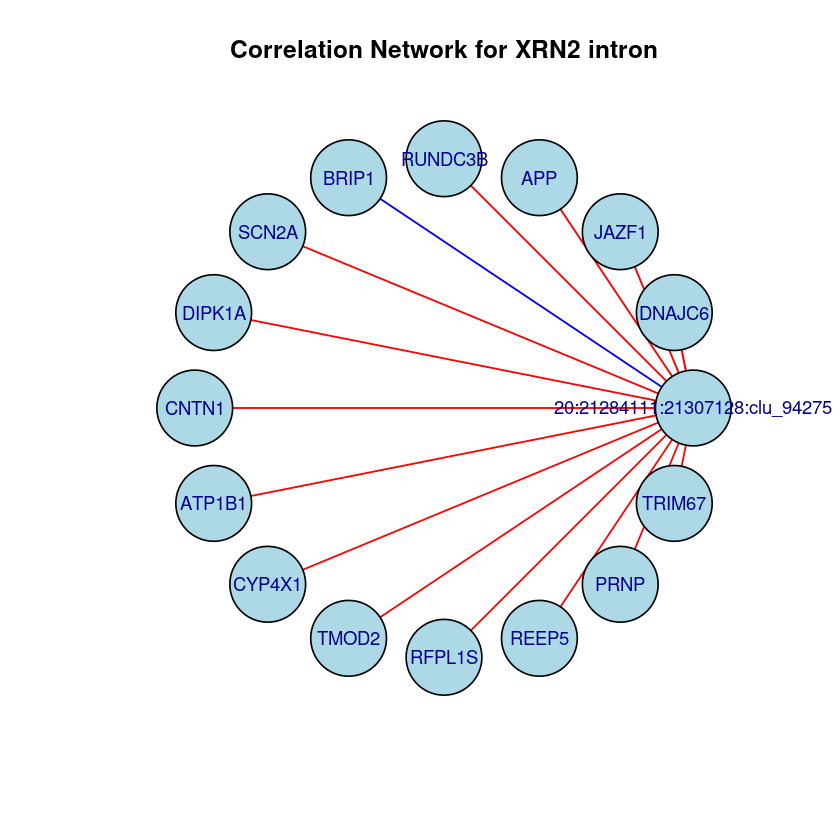

In [51]:
plot(graph, 
     layout = layout_in_circle, 
     vertex.size = 30,          # Set the size of nodes
     vertex.label.cex = 0.9,      # Adjust node label size
     vertex.color = "lightblue", # Set node color
     main = "Correlation Network for XRN2 intron")


In [46]:
top15

,Gene,cor,gene_type,gene_name
,<chr>,<dbl>,<chr>,<chr>
1,ENSG00000116675,0.4060202,protein_coding,DNAJC6
2,ENSG00000153814,0.3802667,protein_coding,JAZF1
3,ENSG00000142192,0.3745854,protein_coding,APP
4,ENSG00000105784,0.3717949,protein_coding,RUNDC3B
5,ENSG00000136492,-0.3685561,protein_coding,BRIP1
6,ENSG00000136531,0.3682606,protein_coding,SCN2A
7,ENSG00000154511,0.3671967,protein_coding,DIPK1A
8,ENSG00000018236,0.3658373,protein_coding,CNTN1
9,ENSG00000143153,0.3654598,protein_coding,ATP1B1


In [ ]:


# Compute the layout with "geneA" in the middle
# layout <- layout_with_fr(graph)
# layout <- layout_with_kk(graph)


# Calculate edge widths based on correlations (adjust scaling as needed)
min_width <- 1  # Minimum edge width
max_width <- 4  # Maximum edge width
scaled_weights <- (E(graph)$weight - min(E(graph)$weight)) / (max(E(graph)$weight) - min(E(graph)$weight))
scaled_weights <- min_width + (max_width - min_width) * scaled_weights

# Plot the graph with different edge widths based on correlations
plot(graph, 
#      layout = layout,           # Use the computed layout
     vertex.size = 30,          # Set the size of nodes
     vertex.label.cex = 1,      # Adjust node label size
     vertex.color = "lightblue", # Set node color
     edge.width = scaled_weights, # Set edge widths based on correlations
     edge.arrow.size = 0.5,     # Set arrow size
     edge.color = "gray",       # Set edge color
     main = "Correlation Network for XRN2 intron")  # Set the plot title

**isoform**

In [71]:
shared <- intersect(colnames(dat), colnames(gene.dat)) # shared samples

In [73]:
length(shared)

[1] 637

In [75]:
gene.dat <- gene.dat %>% select(Gene, all_of(shared))
dat <- dat %>% select(Tx, all_of(shared))

In [76]:
dim(gene.dat)
dim(dat)

[1] 31947   638

[1] 127986    638

In [80]:
df <- as.data.frame(gene.dat[,1])
colnames(df)[1] <- "Gene"

In [81]:
head(df)

,Gene
,<chr>
1,ENSG00000000419
2,ENSG00000000457
3,ENSG00000000460
4,ENSG00000000938
5,ENSG00000000971
6,ENSG00000001036


In [82]:
for (i in 1:nrow(df)) {
    df[i,'cor'] <- cor(unlist(dat[which(dat$Tx == "ENST00000377191.5_2"),2:638]), 
                       unlist(gene.dat[i, 2:638]), method = "pearson")
}

In [83]:
head(df)

,Gene,cor
,<chr>,<dbl>
1,ENSG00000000419,0.7613938
2,ENSG00000000457,0.3440351
3,ENSG00000000460,0.4739170
4,ENSG00000000938,-0.3017584
5,ENSG00000000971,-0.1432250
6,ENSG00000001036,0.2436893


In [94]:
df1 <- df %>% inner_join(gtf, by = c("Gene" = "ensg"))

In [95]:
head(df1)
dim(df1)

,Gene,cor,V11,V12
,<chr>,<dbl>,<chr>,<chr>
1,ENSG00000000419,0.7613938,protein_coding,DPM1
2,ENSG00000000457,0.3440351,protein_coding,SCYL3
3,ENSG00000000460,0.4739170,protein_coding,C1orf112
4,ENSG00000000938,-0.3017584,protein_coding,FGR
5,ENSG00000000971,-0.1432250,protein_coding,CFH
6,ENSG00000001036,0.2436893,protein_coding,FUCA2


[1] 31947     4

In [96]:
colnames(df1)[3] <- "gene_type"
colnames(df1)[4] <- "gene_name"

In [97]:
df1 %>% arrange(desc(abs(cor))) %>% head()

,Gene,cor,gene_type,gene_name
,<chr>,<dbl>,<chr>,<chr>
1,ENSG00000088930,0.9724145,protein_coding,XRN2
2,ENSG00000092199,0.8650962,protein_coding,HNRNPC
3,ENSG00000119335,0.8396977,protein_coding,SET
4,ENSG00000165119,0.8394795,protein_coding,HNRNPK
5,ENSG00000166226,0.8317736,protein_coding,CCT2
6,ENSG00000115758,0.8302709,protein_coding,ODC1


In [99]:
df1 <- df1 %>% arrange(desc(abs(cor)))

In [100]:
write.table(df1, "XRN2_isoform_cor.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

In [102]:
range(df1$cor)

[1] -0.7485113  0.9724145

In [111]:
top15 <- df1[1:15,]

In [112]:
top15

,Gene,cor,gene_type,gene_name
,<chr>,<dbl>,<chr>,<chr>
1,ENSG00000088930,0.9724145,protein_coding,XRN2
2,ENSG00000092199,0.8650962,protein_coding,HNRNPC
3,ENSG00000119335,0.8396977,protein_coding,SET
4,ENSG00000165119,0.8394795,protein_coding,HNRNPK
5,ENSG00000166226,0.8317736,protein_coding,CCT2
6,ENSG00000115758,0.8302709,protein_coding,ODC1
7,ENSG00000165512,0.8287878,protein_coding,ZNF22
8,ENSG00000181163,0.8279548,protein_coding,NPM1
9,ENSG00000126261,0.8243015,protein_coding,UBA2


In [122]:
# Create an igraph graph object
graph_data <- data.frame(from = character(0), to = character(0), weight = numeric(0))
graph <- graph.data.frame(graph_data, directed = FALSE)

# Add "geneA" as the central node
graph <- add_vertices(graph, name = "ENST00000377191", n=1)

In [123]:
# Add other genes as nodes and create edges based on correlations
for (i in 1:15) {
  gene_name <- top15[i,'gene_name']
  graph <- add.vertices(graph, name = gene_name, n=1)
  graph_data <- rbind(graph_data, data.frame(from = "ENST00000377191", to = gene_name, weight = top15[i,'cor']))
}

# Add edge data to the graph
graph <- graph.data.frame(graph_data, directed = FALSE)

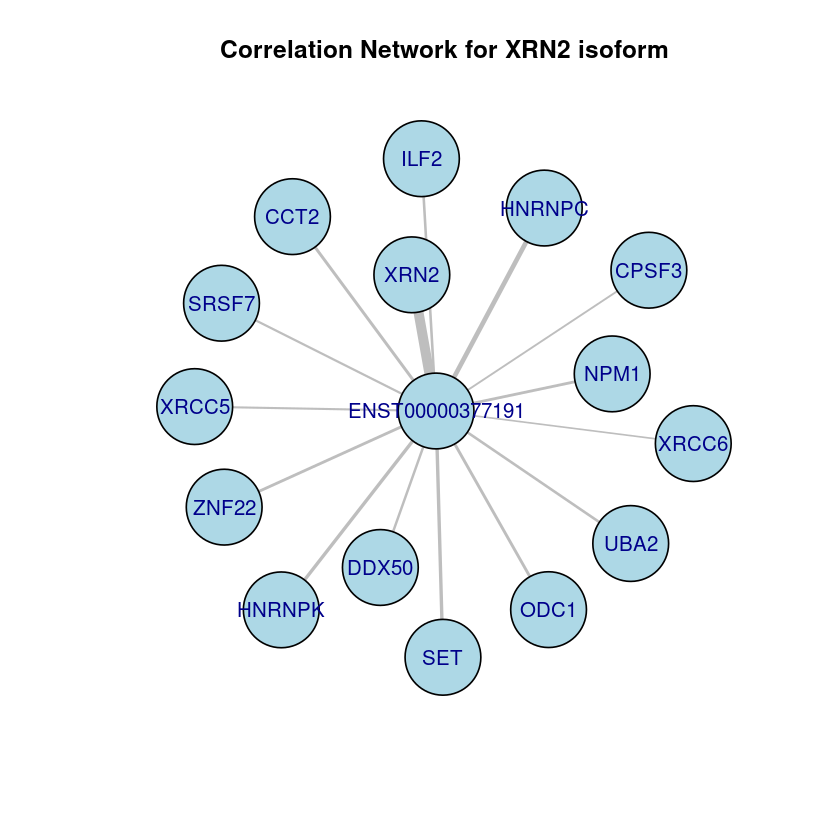

In [135]:
# Compute the layout with "geneA" in the middle
layout <- layout_with_fr(graph)

# Calculate edge widths based on correlations (adjust scaling as needed)
min_width <- 1  # Minimum edge width
max_width <- 6  # Maximum edge width
scaled_weights <- (E(graph)$weight - min(E(graph)$weight)) / (max(E(graph)$weight) - min(E(graph)$weight))
scaled_weights <- min_width + (max_width - min_width) * scaled_weights

# Plot the graph with different edge widths based on correlations
plot(graph, 
     layout = layout,           # Use the computed layout
     vertex.size = 30,          # Set the size of nodes
     vertex.label.cex = 1,      # Adjust node label size
     vertex.color = "lightblue", # Set node color
     edge.width = scaled_weights, # Set edge widths based on correlations
     edge.arrow.size = 0.5,     # Set arrow size
     edge.color = "gray",       # Set edge color
     main = "Correlation Network for XRN2 isoform")  # Set the plot title



**remove XRN2**

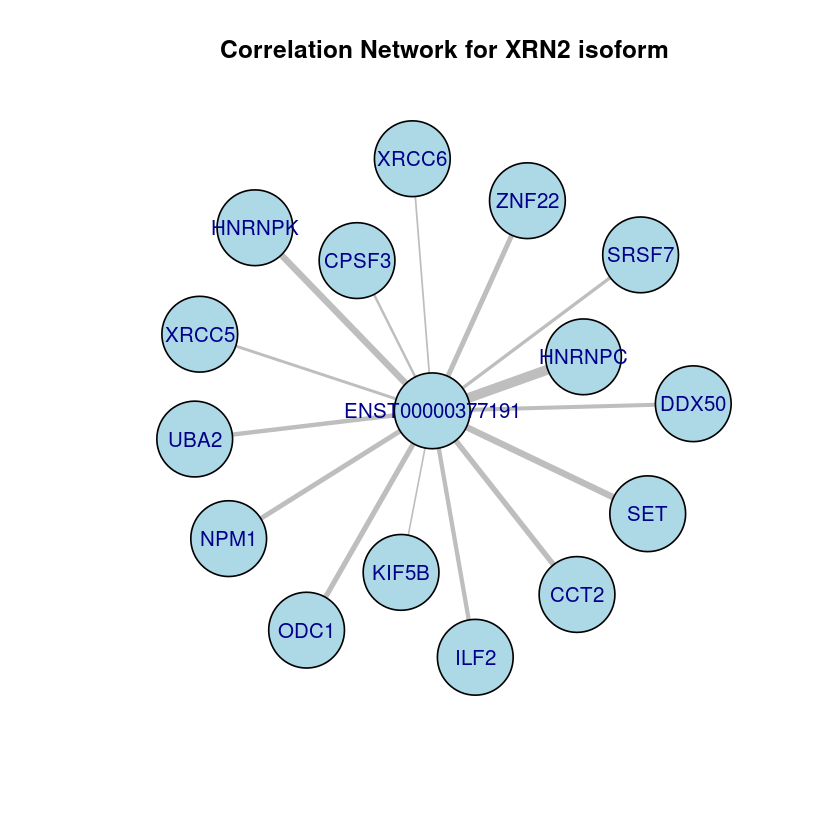

In [136]:
top15 <- df1[2:16,]

# Create an igraph graph object
graph_data <- data.frame(from = character(0), to = character(0), weight = numeric(0))
graph <- graph.data.frame(graph_data, directed = FALSE)

# Add "geneA" as the central node
graph <- add_vertices(graph, name = "ENST00000377191", n=1)

# Add other genes as nodes and create edges based on correlations
for (i in 1:15) {
  gene_name <- top15[i,'gene_name']
  graph <- add.vertices(graph, name = gene_name, n=1)
  graph_data <- rbind(graph_data, data.frame(from = "ENST00000377191", to = gene_name, weight = top15[i,'cor']))
}

# Add edge data to the graph
graph <- graph.data.frame(graph_data, directed = FALSE)


# Compute the layout with "geneA" in the middle
layout <- layout_with_fr(graph)

# Calculate edge widths based on correlations (adjust scaling as needed)
min_width <- 1  # Minimum edge width
max_width <- 6  # Maximum edge width
scaled_weights <- (E(graph)$weight - min(E(graph)$weight)) / (max(E(graph)$weight) - min(E(graph)$weight))
scaled_weights <- min_width + (max_width - min_width) * scaled_weights

# Plot the graph with different edge widths based on correlations
plot(graph, 
     layout = layout,           # Use the computed layout
     vertex.size = 30,          # Set the size of nodes
     vertex.label.cex = 1,      # Adjust node label size
     vertex.color = "lightblue", # Set node color
     edge.width = scaled_weights, # Set edge widths based on correlations
     edge.arrow.size = 0.5,     # Set arrow size
     edge.color = "gray",       # Set edge color
     main = "Correlation Network for XRN2 isoform")  # Set the plot title

